## Exercise Set 2 for OSM 

### Dynamic Programming with John Stachurski

Exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

### Exercise 1

Consider the setting of the [stochastic optimal growth model](https://lectures.quantecon.org/py/optgrowth.html), with the same notation and same assumptions on the primitives $u$, $f$, $\beta$ and $\phi$. 

Let $\mathscr C$ be all continuous bounded functions on $\mathbb R_+$.

Let $\sigma \in \Sigma$ be any feasible policy and let $U$ be the operator from $\mathscr C$ to itself defined by

$$ Uw(y) = u(\sigma(y)) + \beta \int w(f(y - \sigma(y))z) \phi(dz) \qquad (y \in \mathbb R_+)$$

Prove that $U$ is a contraction mapping with respect to the supremum distance.  Argue that the unique fixed point of $U$ in $\mathscr C$ is $v_\sigma$.

("Argue" means provide a sketch of a proof that contains the key ideas, plus some intuition.  Or give a complete, formal proof, if you can.)

Proof: Let operator $U$ be a contraction mapping $U :  \mathscr{C} \rightarrow \mathscr{C} \iff \exists k, \ 0 \leq k < 1$ such that $d'(f(x),f(y)) \leq kd(x,y)$. $U$ is stated as:
\begin{equation}
Uw(y) = u(\sigma (y)) + \beta \int w(f(y - \sigma (y))z)\phi (dz)
\end{equation}
We observe the following:
\begin{equation}
\begin{split}
\|Uw(y)-Uq(y)\| =& \ sup_{y \geq 0}| u(\sigma (y)) + \beta \int w(f(y - \sigma (y))z)\phi (dz) - u(\sigma (y)) - \beta \int q(f(y - \sigma (y))z)\phi (dz) | \\
=& \ sup_{y \geq 0}| \beta \int w(f(y - \sigma (y))z)\phi (dz) - \beta \int q(f(y - \sigma (y))z)\phi (dz) | \\ 
=& \ sup_{y \geq 0}| \beta \Big[ \int w(f(y - \sigma (y))z)\phi (dz) - \int q(f(y - \sigma (y))z)\phi (dz) \Big] | \\ 
=& \ sup_{y \geq 0}| \beta \Big[ \int w(f(y - \sigma (y))z) - q(f(y - \sigma (y))z)\phi (dz) \Big] | \\ 
<& \ \beta \Big[ \int sup_{y \geq 0} | w(f(y - \sigma (y))z) - q(f(y - \sigma (y))z) |\phi (dz) \Big]  \\ 
<& \ \int sup_{y \geq 0} | w(f(y - \sigma (y))z) - q(f(y - \sigma (y))z) |\phi (dz)  \\ 
=& \ \int sup_{y \geq 0} |w(y) - q(y)|  \\ 
=& \ sup_{y \geq 0}|w(y) - q(y)| \int \\
=& \ \|w(y) - q(y) \|
\end{split}
\end{equation}
From this, we can use the Banach Fixed-Point Theorem to show that if $\mathscr{C}$ is complete (as it is trivial that it is non-empty). Hence, a unique fixed-point exists that is equal to $v_\sigma$, as it uses the same method of calculation as we do for our Bellman equation. Hence, we have that the fixed point exists, is unique, and is exactly $v_\sigma$.

### Exercise 2

Notation and concepts continue from exercise 2.

Use the fact you proved in exercise 2, combined with piecewise linear interpolation method we used for the Bellman operator, to compute and plot good approximations of the value $v_\sigma$ of the policies

* $\sigma_1(y) = 0.95 y$
* $\sigma_2(y) = H(y) y$ where $H$ is the cdf of the lognormal $LN(0, 0.5)$ distribution.

For the latter use `scipy.stats.lognorm.cdf(y, 0.5)`

For the primitives, use the default specification in the `LogLinearOG` class from the [stochastic optimal growth model lecture](https://lectures.quantecon.org/py/optgrowth.html).

Plot your results, choosing grid and plotting dimensions to best illustrate the two functions.  Based on the plot alone, argue that neither of these policies is an optimal policy.

In [2]:
import numpy as np
from scipy.optimize import fminbound


def bellman_operator(w, grid, beta, u, f, shocks, Tw=None, compute_policy=False,sig=1):
    """
    The approximate Bellman operator, which computes and returns the
    updated value function Tw on the grid points.  An array to store
    the new set of values Tw is optionally supplied (to avoid having to
    allocate new arrays at each iteration).  If supplied, any existing data in 
    Tw will be overwritten.

    Parameters
    ----------
    w : array_like(float, ndim=1)
        The value of the input function on different grid points
    grid : array_like(float, ndim=1)
        The set of grid points
    beta : scalar
        The discount factor
    u : function
        The utility function
    f : function
        The production function
    shocks : numpy array
        An array of draws from the shock, for Monte Carlo integration (to
        compute expectations).
    Tw : array_like(float, ndim=1) optional (default=None)
        Array to write output values to
    compute_policy : Boolean, optional (default=False)
        Whether or not to compute policy function

    """
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == #
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        sigma = np.empty_like(w)
        
    def sig1(inp):
        return 0.95*inp
    
    def sig2(inp):
        return scipy.stats.lognorm.cdf(inp, 0.5)*inp

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(y):
            if sig == 1:
                return - u(sig1(y)) - beta * np.mean(w_func(f(y - sig1(y)) * shocks))
            if sig == 2:
                return - u(sig2(y)) - beta * np.mean(w_func(f(y - sig2(y)) * shocks))
        c_star = fminbound(objective, 1e-10, y)
        if compute_policy:
            sigma[i] = c_star
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, sigma
    else:
        return Tw


Part 1

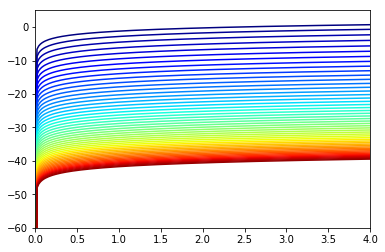

In [9]:
alpha=0.4
beta=0.96
mu=0
s=0.1
grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral
n = 50

grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))
w = np.log(grid)  # An initial condition
for i in range(n):
    w = bellman_operator(w,grid,beta,np.log,lambda k: k**alpha,shocks,None,False,1)
    plt.plot(grid,w,color=plt.cm.jet(i / n))
plt.axis([0.0,4.0,-60,5])
plt.show()

Part 2

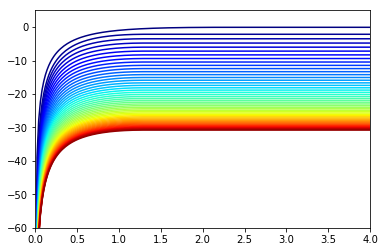

In [10]:
w = np.log(grid) 
for i in range(n):
    w = bellman_operator(w,grid,beta,np.log,lambda k: k**alpha,shocks,None,False,2)
    plt.plot(grid,w,color=plt.cm.jet(i / n))
plt.axis([0.0,4.0,-60,5])
plt.show()

Both of these policies converge to very different levels in the long run. In addition, neither converge to the correct value function. Hence, we should conclude that neither of these are optimal policies.